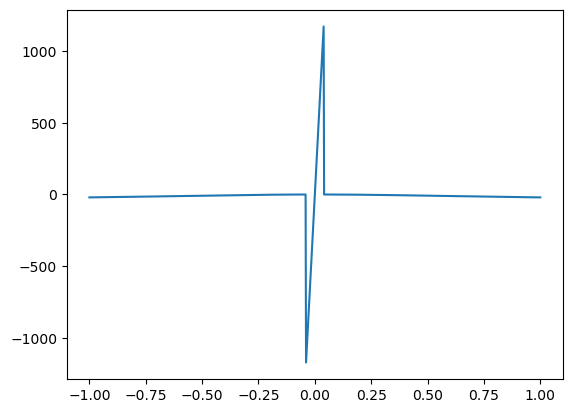

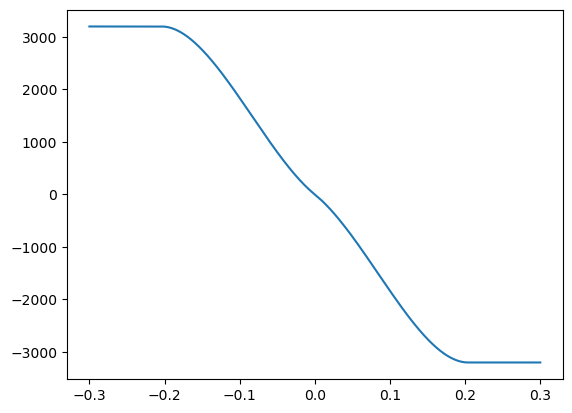

In [5]:
####
#Fiala fit
####

import numpy as np
import matplotlib.pyplot as plt

import fiala as f
import Pacejka52 as pa52

Fz = 4000
Fz0 = 3114
IA = 0

i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

params_Fx_init = [30000, 0.4, 0.6]
params_Fy_init = [11600, 0.2, 0.8]
Fx = f.fiala_long(Sx,Sy,Fz, *params_Fx_init)
Fy = f.fiala_lat(Sy,Fz, *params_Fy_init)

plt.figure(1)
plt.plot(Sx,Fx)

plt.figure(2)
plt.plot(Sy,Fy)

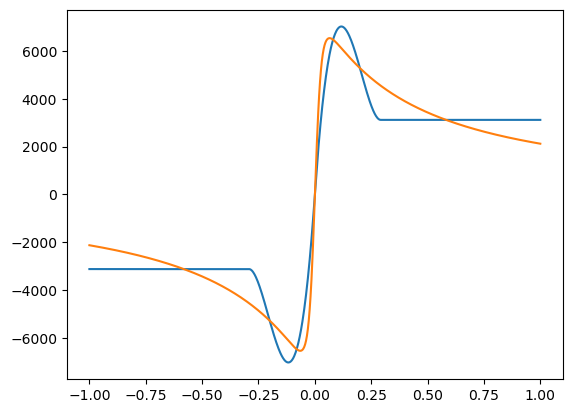

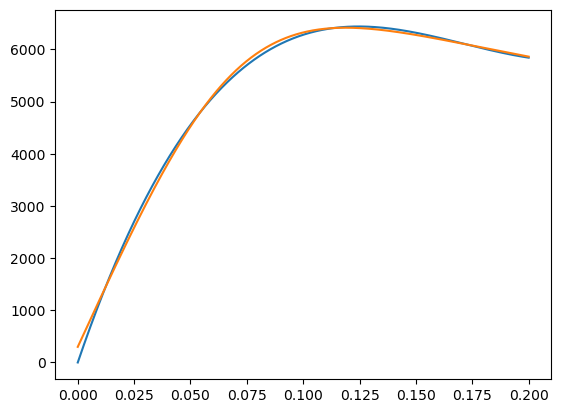

In [53]:
#Fitting
import scipy.optimize as opt
from scipy.optimize import curve_fit
#Pacejka 52
IA = 0
Fz0 = 3114

Sx = np.linspace(-1,1,1000)
Sy = np.linspace(0,0.2,1000)

params_Fx_init = [30000, 0.4, 0.6]
params_Fy_init = [11600, 0.2, 0.8]

Fx_pa = pa52.Pacejka52_long(Fz,Sx,IA,Fz0)[0]
Fy_pa = pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]


def Fx_fi_func(Sx,C_long,mu1,mu2):
    return f.fiala_long(Sx,Sy,Fz,C_long,mu1,mu2)

def Fy_fi_func(Sy, C_lat,mu1,mu2):
    return f.fiala_lat(Sy,Fz,C_lat,mu1,mu2)

Fx_fi_params, _ = curve_fit(Fy_fi_func, Sx, Fx_pa, params_Fx_init)
Fy_fi_params, _ = curve_fit(Fy_fi_func, Sy, Fy_pa, params_Fy_init)

Fx_fi_fit = Fy_fi_func(Sx,Fx_fi_params[0],Fx_fi_params[1],Fx_fi_params[2])
Fy_fi_fit = Fy_fi_func(Sy,Fy_fi_params[0],Fy_fi_params[1], Fy_fi_params[2])

plt.figure(1)
plt.plot(Sx,Fx_fi_fit)
plt.plot(Sx,Fx_pa)

plt.figure(2)
plt.plot(Sy,Fy_fi_fit)
plt.plot(Sy,Fy_pa)


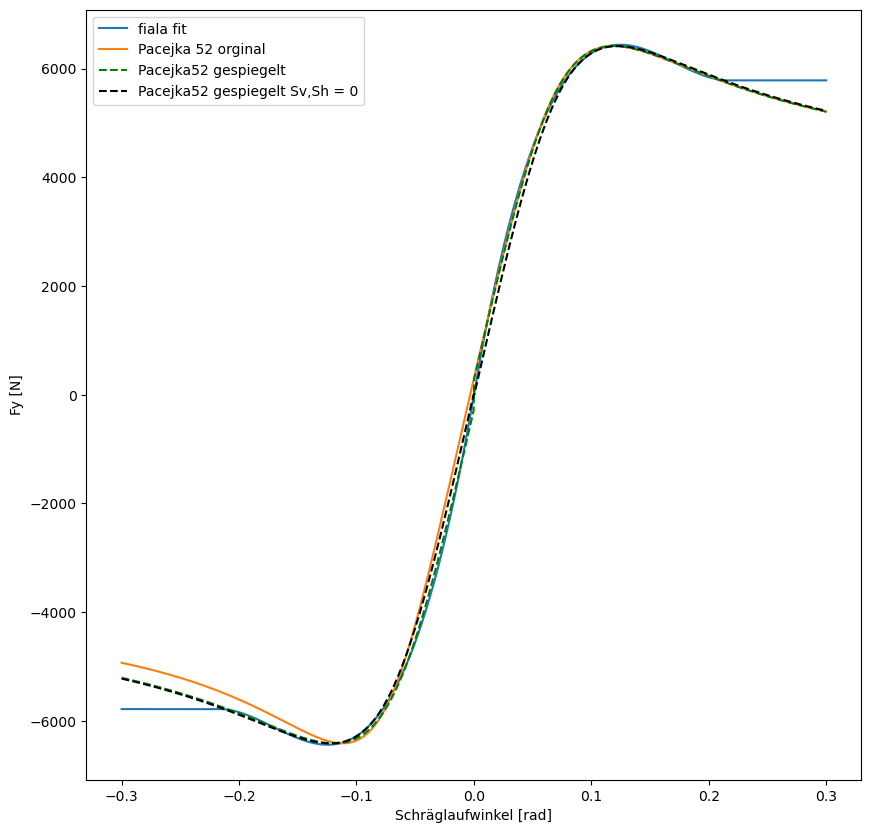

In [56]:
Syy = np.linspace(-0.3,0.3,1000)
Fy = Fy_fi_func(Syy,Fy_fi_params[0],Fy_fi_params[1], Fy_fi_params[2])
Fy_pa = pa52.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]

Sy_pos = np.linspace(0,0.3,500)
Fy_pos = Fy_fi_func(Sy_pos,Fy_fi_params[0],Fy_fi_params[1], Fy_fi_params[2])

Fy_pos_left = Fy_pos * (-1)
Fy_left = np.zeros(len(Sy_pos))
for i in range(0,len(Sy_pos)):
    Fy_left[i] = Fy_pos_left[499 - i]

Fy_new = np.concatenate((Fy_left, Fy_pos))


#Pacejka gespiegelt

Fy_pa_pos = pa52.Pacejka52_lat(Fz,Sy_pos,IA,Fz0)[0]
Fy_pa_neg = Fy_pa_pos * (-1)

Fy_pa_left = np.zeros(len(Sy_pos))
for i in range(0,len(Sy_pos)):
    Fy_pa_left[i] = Fy_pa_neg[499 - i]

Fy_pa_new = np. concatenate((Fy_pa_left, Fy_pa_pos))




#Pacejka Sy,Sx == 0

import Pacejka52_Sv_Sh_0 as pa0

Fy_pa0_pos = pa0.Pacejka52_lat(Fz,Sy_pos,IA,Fz0)[0]
Fy_pa0_neg = Fy_pa0_pos * (-1)

Fy_pa0_left = np.zeros(len(Sy_pos))
for i in range(0,len(Sy_pos)):
    Fy_pa0_left[i] = Fy_pa0_neg[499 - i]

Fy_pa0_new = np. concatenate((Fy_pa0_left, Fy_pa0_pos))



#Plots:
plt.figure( figsize=(10,10) )

plt.plot(Syy,Fy, label = "fiala fit")
plt.plot(Syy,Fy_pa, label = "Pacejka 52 orginal")
#plt.plot(Syy,Fy_new,  'r--', label = "fiala gespiegelt")
plt.plot(Syy,Fy_pa_new, 'g--', label = "Pacejka52 gespiegelt")
plt.plot(Syy,Fy_pa0_new, 'k--', label = "Pacejka52 gespiegelt Sv,Sh = 0")

plt.xlabel("Schräglaufwinkel [rad]")
plt.ylabel("Fy [N]")

plt.legend()


[1, 2, 3, 4, 5, 6]
